In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

## Got the dataset from Kaggle.

In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


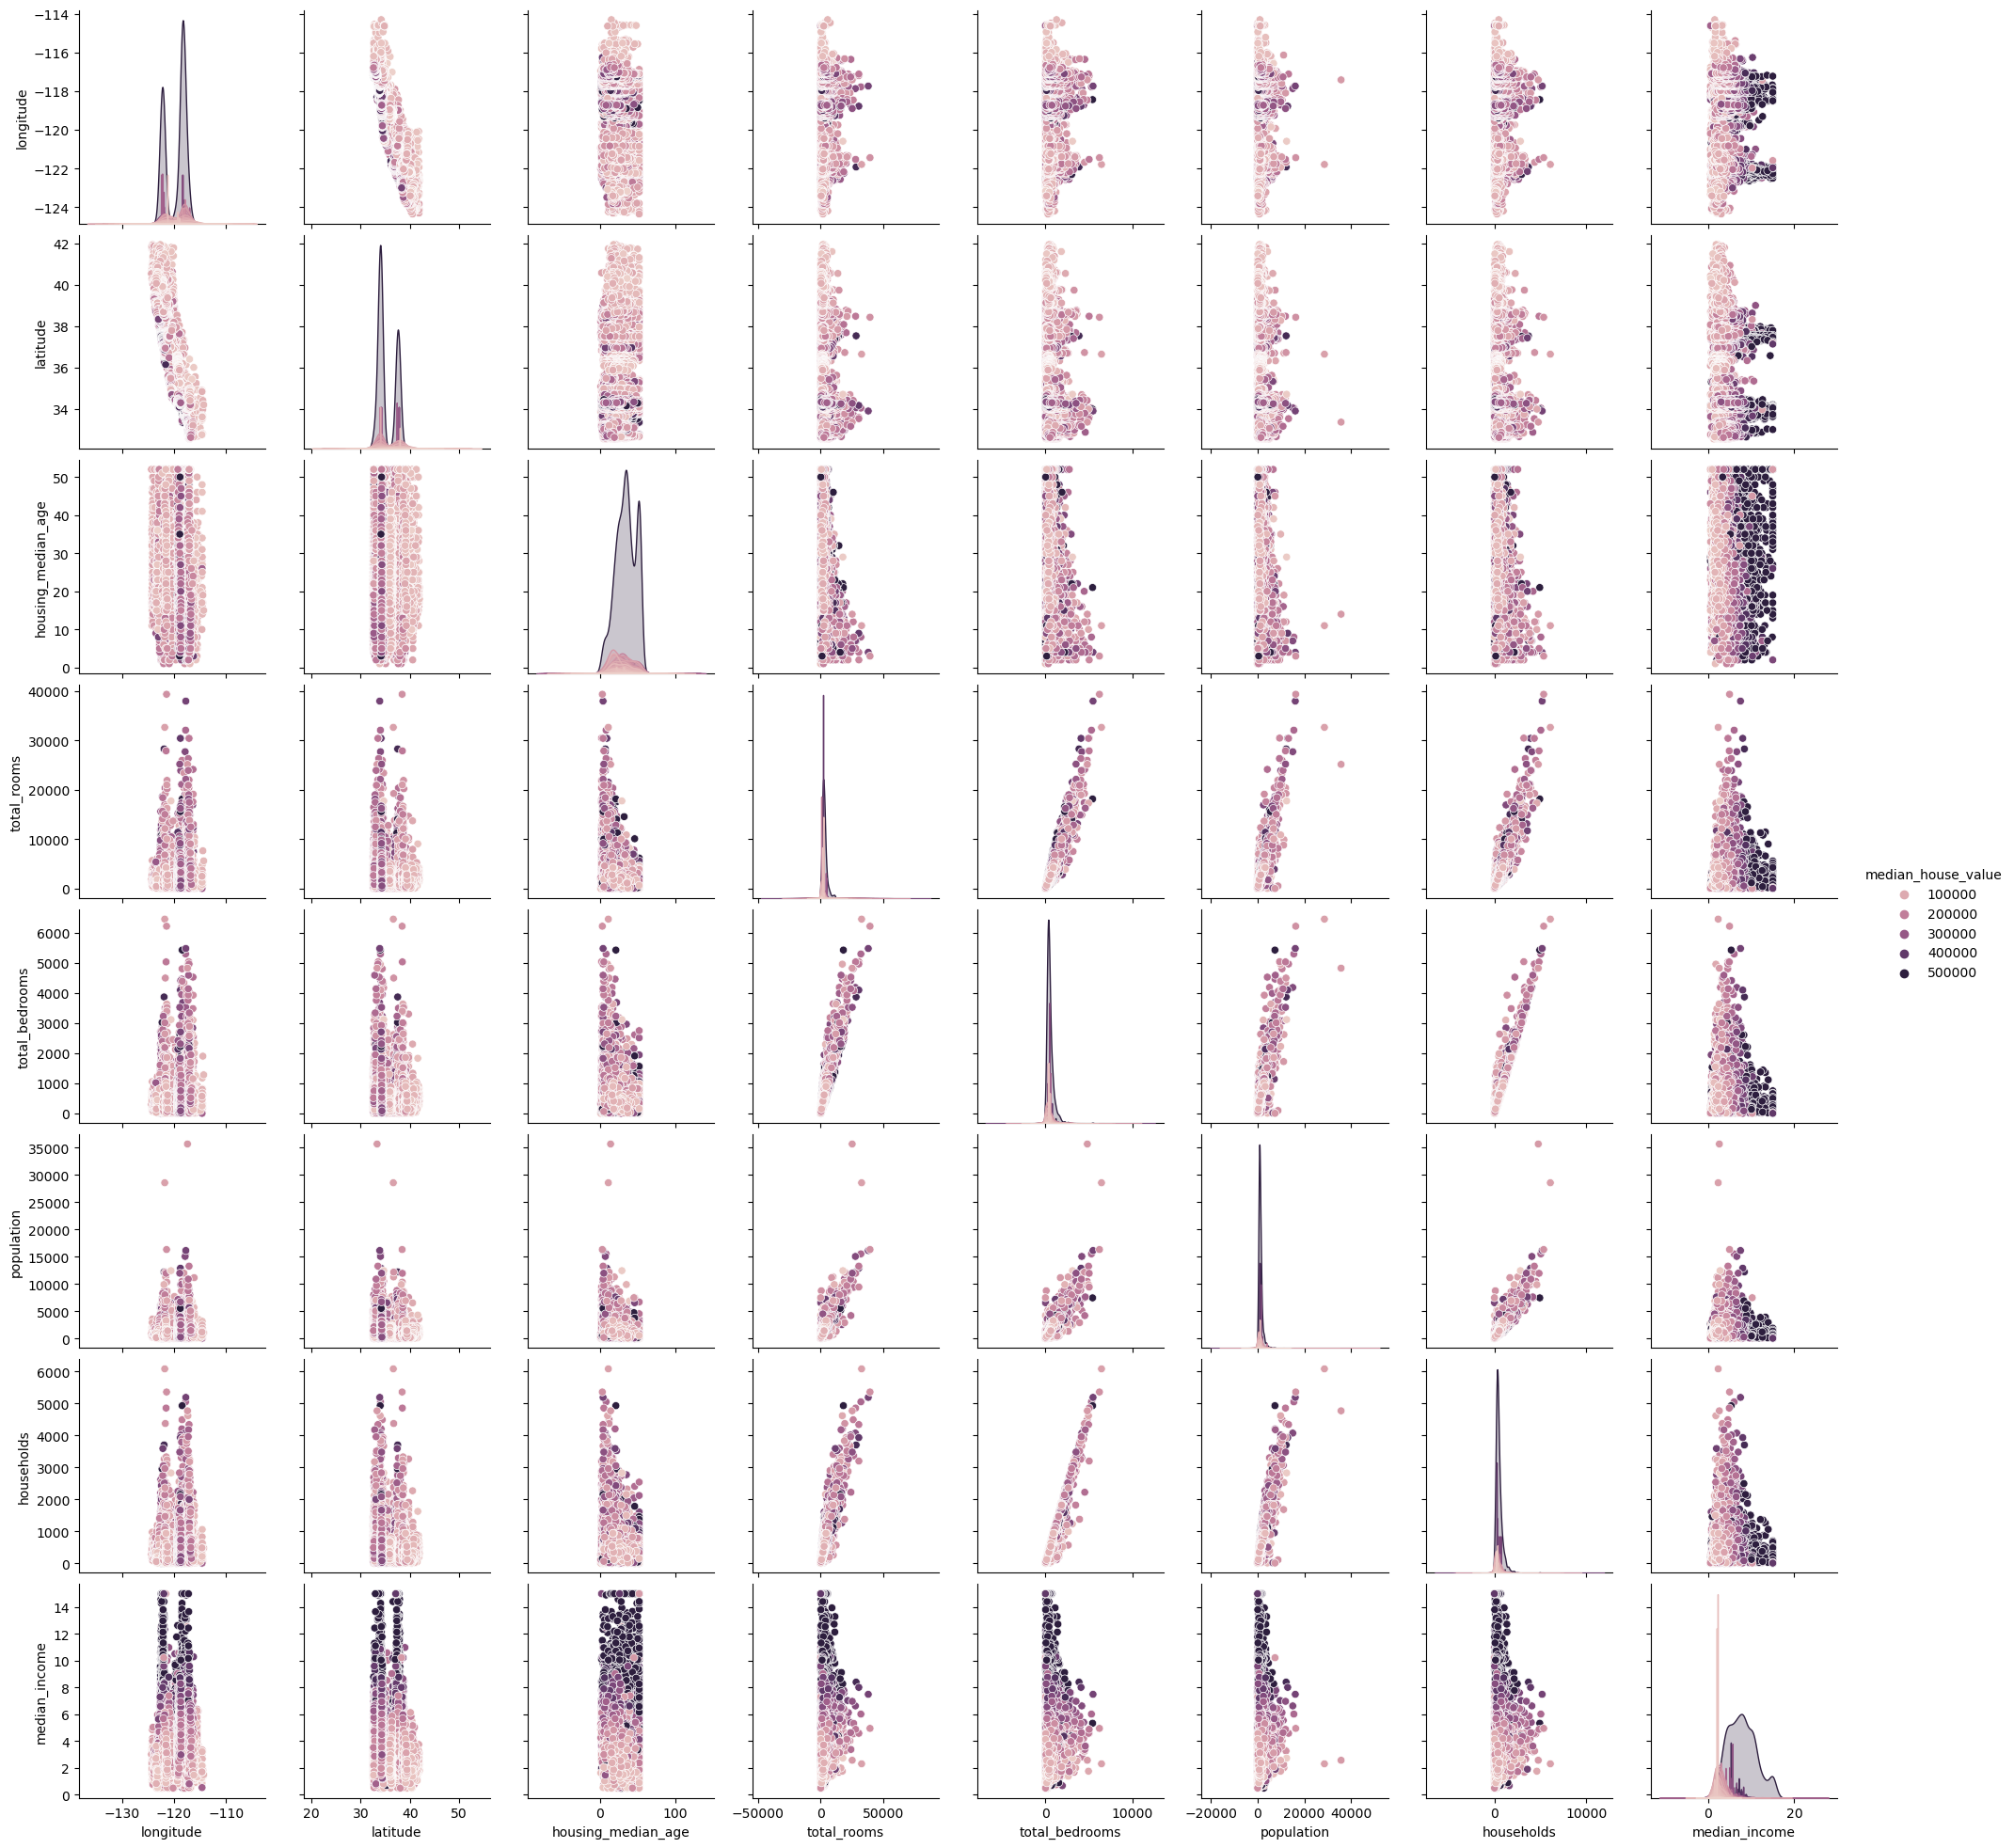

In [6]:
sns.pairplot(housing, hue='median_house_value');

In [7]:
housing = housing.drop('ocean_proximity', axis=1)

In [29]:
sc = StandardScaler()


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
housing = housing.drop(['total_bedrooms'], axis=1)

In [11]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [12]:
X = housing.iloc[:, :-1].values

In [13]:
y = housing.iloc[:, -1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train);

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([209880.43, 284394.84, 192821.29, ...,  82426.22, 280775.39,
       205491.84])

In [34]:
np.set_printoptions(precision=2)

In [35]:
y_pred = y_pred.reshape(len(y_pred), 1)
y_test = y_test.reshape(len(y_test), 1)

In [36]:
np.concatenate((y_test, y_pred), 1)

array([[136900.  , 209880.43],
       [241300.  , 284394.84],
       [200700.  , 192821.29],
       ...,
       [128600.  ,  82426.22],
       [259500.  , 280775.39],
       [167600.  , 205491.84]])

In [37]:
r2_score(y_test, y_pred) * 100

62.13204922137676

In [38]:
mytree = DecisionTreeRegressor()
mytree = mytree.fit(X_train, y_train)

In [39]:
y_tree_pred = mytree.predict(X_test)
y_tree_pred = y_tree_pred.reshape(len(y_tree_pred), 1)

In [40]:
np.concatenate((y_test, y_tree_pred), 1)

array([[136900., 134800.],
       [241300., 202800.],
       [200700., 133400.],
       ...,
       [128600., 107200.],
       [259500., 297300.],
       [167600., 209300.]])

In [41]:
r2_score(y_test, y_tree_pred) * 100

65.16756731329507

In [42]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
forest_pred = forest.predict(X_test)
forest_pred = forest_pred.reshape(len(forest_pred), 1)

In [44]:
np.round(r2_score(y_test, forest_pred)*100, 2)

82.0

In [48]:
Poly_reg = PolynomialFeatures(degree = 2)
X_poly = Poly_reg.fit_transform(X_train)

In [49]:
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y_train)


LinearRegression()

In [52]:
linear_pred = linear_reg.predict(Poly_reg.transform(X_test))

In [53]:
linear_pred

array([201872.91, 276109.58, 161698.6 , ..., 122226.85, 268236.02,
       204627.48])

In [54]:
r2_score(y_test, linear_pred)

0.6797445227522689

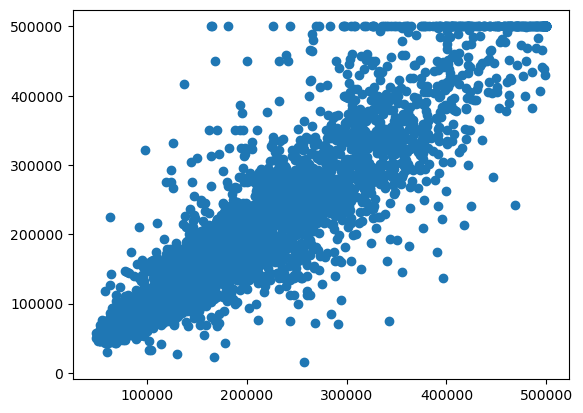

In [58]:
plt.scatter(forest_pred, y_test);